In [5]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv("C:\\Users\\ASUS\\Desktop\\MY PROJECT\\TS_SALES\\merged_ts_data.csv")

In [7]:
all_category = list(data['family'].unique())
def get_data(data, store_nos, category):
    df = data[data['store_nbr'].isin(store_nos)]
    df = df[df['family'].isin(category)]
    df['date'] = pd.to_datetime(df['date']) 
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['time'] = range(len(df))
    df = df.reset_index()
    if "id" in df.columns:
        df = df.drop(columns = ['id', 'onpromotion','index'], axis = 1)
    return(df)


In [18]:

def decompose_time_series(time_series, period):
    """
    Decompose a time series into trend, seasonality, and residual components,
    and return the plots of each component. Also, return the stationary time series.

    Parameters:
    - time_series: pandas Series
      The input time series.
    - period: int
      The number of observations per cycle (seasonality) in the time series.

    Returns:
    - stationary_series: pandas Series
      The stationary time series after differencing.
    """

    # Decompose time series
    decomposition = seasonal_decompose(time_series, period=period)

    # Set Seaborn style
    sns.set(style="whitegrid")

    # Plot components
    plt.figure(figsize=(16, 12))

    plt.subplot(4, 1, 1)
    plt.plot(time_series, label='Original', color='blue')
    plt.legend(loc='upper left')
    plt.title('Original Time Series')

    plt.subplot(4, 1, 2)
    plt.plot(decomposition.trend, label='Trend', color='green')
    plt.legend(loc='upper left')
    plt.title('Trend Component')

    plt.subplot(4, 1, 3)
    plt.plot(decomposition.seasonal, label='Seasonality', color='red')
    plt.legend(loc='upper left')
    plt.title('Seasonality Component')

    plt.subplot(4, 1, 4)
    plt.plot(decomposition.resid, label='Residual', color='purple')
    plt.legend(loc='upper left')
    plt.title('Residual Component')

    plt.tight_layout()
    plt.show()

    # Make the time series stationary (e.g., using differencing)
    stationary_series = time_series.diff().dropna()

    return [stationary_series, decomposition.trend, decomposition.seasonal, decomposition.resid]

# Example usage:
# Assuming 'df["sales"]' is your pandas Series containing the time series data
# and 'your_period' is the number of observations per cycle (seasonality) in your data.

# Replace these lines with your actual data
# your_time_series = ...
# your_period = ...


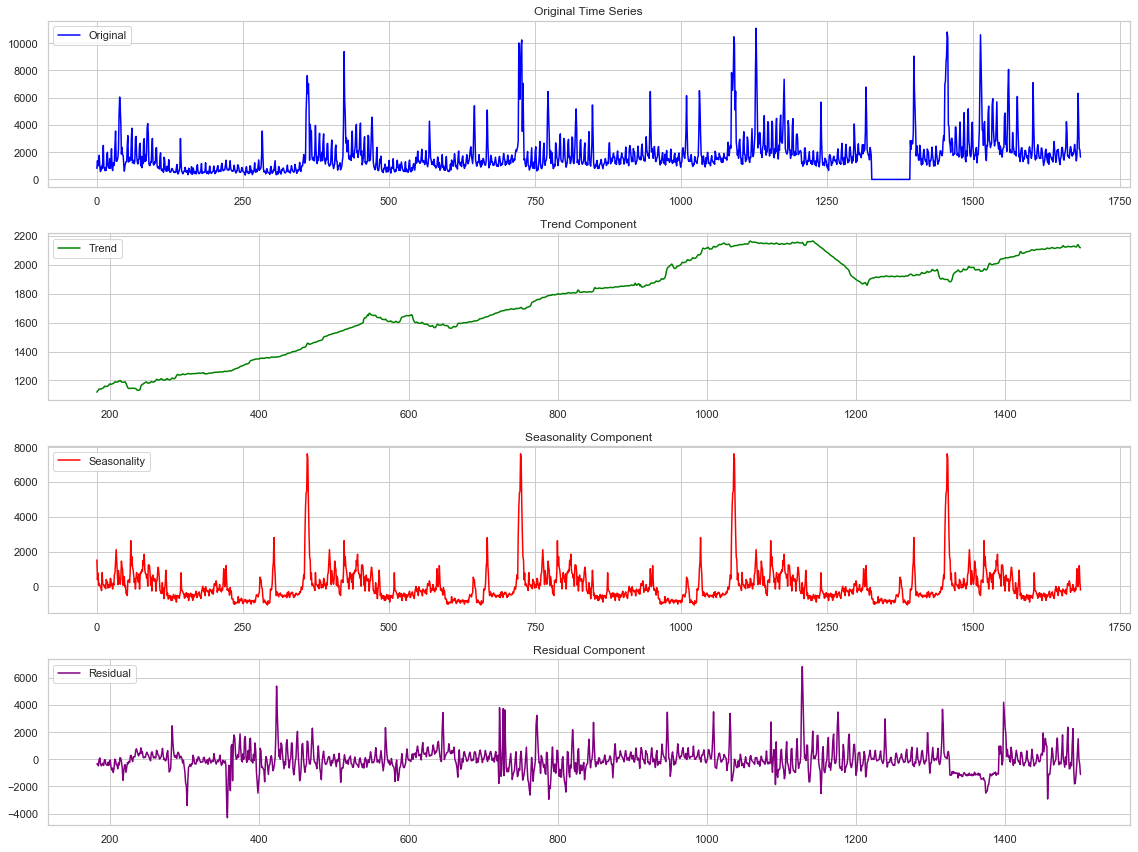

STATIONARY
STATIONARY


In [19]:
df = get_data(data = data, store_nos = [25], category = ['BEVERAGES'])
stationary_series = decompose_time_series(time_series=df["sales"], period = 365)[0]

# Test for stationarity - 
print(ADF(stationary_series))
print(KPSS(stationary_series))

In [ ]:
residual = decompose_time_series(time_series=df["sales"], period=365)[3]

In [2]:
import numpy as np
import pandas as pd

def treat_outliers_interpolation(data, threshold=3):
    """
    Treat outliers in a time series using linear interpolation.

    Parameters:
    - data (numpy array or list): Input time series containing numeric values.
    - threshold (float): Z-score threshold to identify outliers. Default is 3.

    Returns:
    - treated_series (numpy array): Time series with outliers treated using interpolation.
    """

    # Calculate Z-scores
    z_scores = np.abs((data - np.mean(data)) / np.std(data))

    # Identify outliers
    outliers = z_scores > threshold

    # Treat outliers by linear interpolation
    treated_series = pd.Series(data).interpolate(method='linear').values

    return treated_series


Original Series: [   1    2    3    4    5 1000]
Treated Series: [   1    2    3    4    5 1000]


# OUTLIER DETECTION and TRTEATMENT

In [1]:
def handle_outliers(series):
    # Calculate the z-scores
    z_scores = (series - series.mean()) / series.std()

    # Identify and interpolate outliers
    outliers = (z_scores > 3) | (z_scores < -3)

    # Interpolate outliers using linear interpolation
    series[outliers] = np.interp(series.index[outliers], series.index[~outliers], series[~outliers])

    return series


In [ ]:
# Draw the boxplot
plt.figure(figsize = (18,6))
sns.boxplot(x="sales", data=df, color = "skyblue")

# Add labels and title with increased font size
plt.xlabel("Total Sales", fontsize=16)
plt.title("Boxplot of Sales before outlier treatment", fontsize=20)

# Increase the font size of x-axis ticks
plt.xticks(fontsize=14)
# Show the plot
plt.show()

In [ ]:
# Treatment
df = get_data(data = data, store_nos = [25], category = ['BEVERAGES'])
rem_out = handle_outliers(df['sales'])
# Draw the boxplot
plt.figure(figsize=(18, 6))
sns.boxplot(handle_outliers(df['sales']), color="pink")

# Add labels and title with increased font size
plt.xlabel("Total Sales", fontsize=16)
plt.title("Boxplot of Sales after outlier treatment", fontsize=20)

# Increase the font size of x-axis ticks
plt.xticks(fontsize=14)

# Show the plot
plt.show()


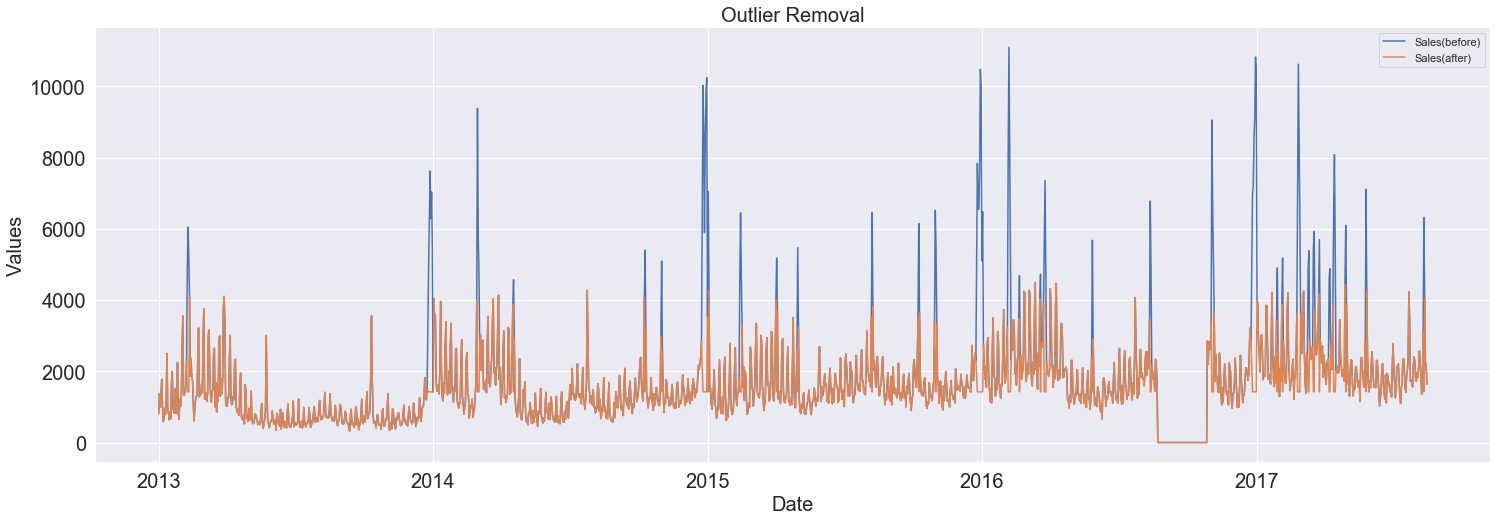

In [76]:

# Set the style of the plot
sns.set(style="darkgrid")

# Create a line plot for Time Series 1
plt.figure(figsize=(25, 8))
sns.lineplot(x='date', y='sales_b', data=dat, label='Sales(before)')

# Create a line plot for Time Series 2
sns.lineplot(x='date', y='sales_a', data=dat, label='Sales(after)')

# Add labels and title with increased font size
plt.xlabel("Date", fontsize=20)
plt.ylabel("Values", fontsize=20)
plt.title("Outlier Removal", fontsize=20)

# Increase the font size of x-axis and y-axis ticks
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [41]:
df.columns

Index(['date', 'store_nbr', 'family', 'sales', 'transactions', 'city',
       'cluster', 'type', 'locale', 'locale_name', 'oil_price', 'holiday_flag',
       'year', 'month', 'day', 'time'],
      dtype='object')

# Correlation term time series

In [1]:
import pandas as pd
import numpy as np

def calculate_correlation_matrix(dataset):
    # Pivot the dataset to create a DataFrame with store_nbr as columns and family as rows
    pivoted_data = dataset.pivot_table(index=['Time', 'family'], columns='Store_nbr', values='sales', aggfunc='sum')

    # Create an empty dictionary to store correlation matrices for each date
    correlation_matrices = {}

    # Iterate over unique dates in the dataset
    unique_dates = dataset['Time'].unique()
    for date in unique_dates:
        # Extract data for the specific date
        date_data = pivoted_data.loc[date]

        # Calculate correlation matrix
        correlation_matrix = date_data.corr()

        # Store the correlation matrix in the dictionary with the date as the key
        correlation_matrices[date] = correlation_matrix

    return correlation_matrices

# Sample data
data = {'Store_nbr': [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
        'Time': ['day1', 'day1', 'day1', 'day2', 'day2', 'day2', 'day1', 'day1', 'day1', 'day2', 'day2', 'day2'],
        'family': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
        'sales': [np.random.randint(10, 60) for _ in range(12)]}

df = pd.DataFrame(data)
# Calculate correlation matrices
correlation_matrices = calculate_correlation_matrix(df)

# Print the result
for date, matrix in correlation_matrices.items():
    print(f"Correlation Matrix for {date}:\n{matrix}\n")


Correlation Matrix for day1:
Store_nbr         1         2
Store_nbr                    
1          1.000000  0.219071
2          0.219071  1.000000

Correlation Matrix for day2:
Store_nbr         1         2
Store_nbr                    
1          1.000000 -0.994564
2         -0.994564  1.000000



In [2]:
list(correlation_matrices.keys())[0]

'day1'

In [3]:
import pandas as pd
import numpy as np

def calculate_correlation_matrix(dataset):
    # Create a DataFrame with columns: 'Store_nbr', 'Time', 'family', 'sales'
    df = pd.DataFrame(dataset)

    # Create an empty dictionary to store correlation matrices
    correlation_matrices = {}

    # Iterate over unique dates in the 'Time' column
    for date in df['date'].unique():
        # Filter data for the current date
        date_data = df[df['date'] == date]

        # Pivot the data to create a matrix with 'Store_nbr' as index and 'family' as columns
        pivot_data = pd.pivot_table(date_data, values='sales', index=['store_nbr'], columns=['family'])

        # Calculate the correlation matrix
        correlation_matrix = pivot_data.corr()

        # Add the correlation matrix to the dictionary
        correlation_matrices[date] = correlation_matrix

    return correlation_matrices
'''
# Example usage:
data = {'Store_nbr': [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
        'Time': ['day1', 'day1', 'day1', 'day2', 'day2', 'day2', 'day1', 'day1', 'day1', 'day2', 'day2', 'day2'],
        'family': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
        'sales': [np.random.randint(15, 2000) for _ in range(12)]}

result = calculate_correlation_matrix(data)
print(result)
'''

"\n# Example usage:\ndata = {'Store_nbr': [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],\n        'Time': ['day1', 'day1', 'day1', 'day2', 'day2', 'day2', 'day1', 'day1', 'day1', 'day2', 'day2', 'day2'],\n        'family': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],\n        'sales': [np.random.randint(15, 2000) for _ in range(12)]}\n\nresult = calculate_correlation_matrix(data)\nprint(result)\n"

In [4]:
res = calculate_correlation_matrix(data)

KeyError: 'date'

In [ ]:
res[data['date'].unique()[1]]

In [ ]:
data.family.unique()

In [ ]:
d = get_data(data,range(1,50),['BEVERAGES','LIQUOR,WINE,BEER','PREPARED FOODS'])

In [ ]:
res1 = calculate_correlation_matrix(d)

In [ ]:
res1[d['date'].unique()[1]]

In [ ]:
res1[d['date'].unique()[2]]

In [ ]:
res1[d['date'].unique()[3]]

In [30]:
res1[d['date'].unique()[4]]

family,BEVERAGES,"LIQUOR,WINE,BEER",PREPARED FOODS
family,,,
BEVERAGES,1.000000,0.744545,0.916977
"LIQUOR,WINE,BEER",0.744545,1.000000,0.761163
PREPARED FOODS,0.916977,0.761163,1.000000


In [34]:
res1[d['date'].unique()[6]]['PREPARED FOODS']['LIQUOR,WINE,BEER']

0.8411187371648551

In [35]:
ts = []
for i in range(len(d['date'].unique())):
    ts.append(res1[d['date'].unique()[i]]['PREPARED FOODS']['LIQUOR,WINE,BEER'])

In [36]:
ts

[1.0,
 0.7862003822057843,
 0.8760476138868505,
 0.49958738191394525,
 0.7611632832926479,
 nan,
 0.8411187371648551,
 0.7393737723471563,
 0.7570045333674593,
 0.5445969563717324,
 0.5195340437754166,
 0.6946923659221969,
 nan,
 0.8178650013062443,
 0.8819000962948896,
 0.9158450325675737,
 0.6510947979138921,
 0.7069402778293953,
 0.7771110852359179,
 nan,
 0.8653941804231674,
 0.8389997216069536,
 0.9466238618552233,
 0.5254386114698325,
 0.6046180957948563,
 0.7799448864910226,
 nan,
 0.5787044958327695,
 0.8072050216445689,
 0.881622120636136,
 0.7056969895093854,
 0.5494860807733293,
 0.7131810022201994,
 nan,
 0.720055957282304,
 0.7541235344389197,
 0.8044363568235365,
 0.568294080242227,
 0.6311470382135316,
 0.411523153764827,
 0.23310403342162764,
 0.07259139602079608,
 0.4722839433616164,
 0.878534984043833,
 0.5858352872067737,
 0.3778409354029359,
 nan,
 nan,
 0.7961617000793334,
 0.7621023733344436,
 0.8608289700073577,
 0.756299387926467,
 0.77251665086843,
 0.637974898

In [40]:
def treat_missing_values(df, method='linear'):
    missing_val_col = df.columns[df.isna().sum() != 0]
    for i in missing_val_col:
        if method == 'ffill':
            df[i] = df[i].ffill()
        elif method == 'bfill':
            df[i] = df[i].bfill()
        elif method == 'linear':
            df[i] = df[i].interpolate(method='linear', inplace=False)
        else:
            raise ValueError("Invalid imputation method. Choose 'ffill', 'bfill', or 'linear'.")
    df = df.dropna()
    return df




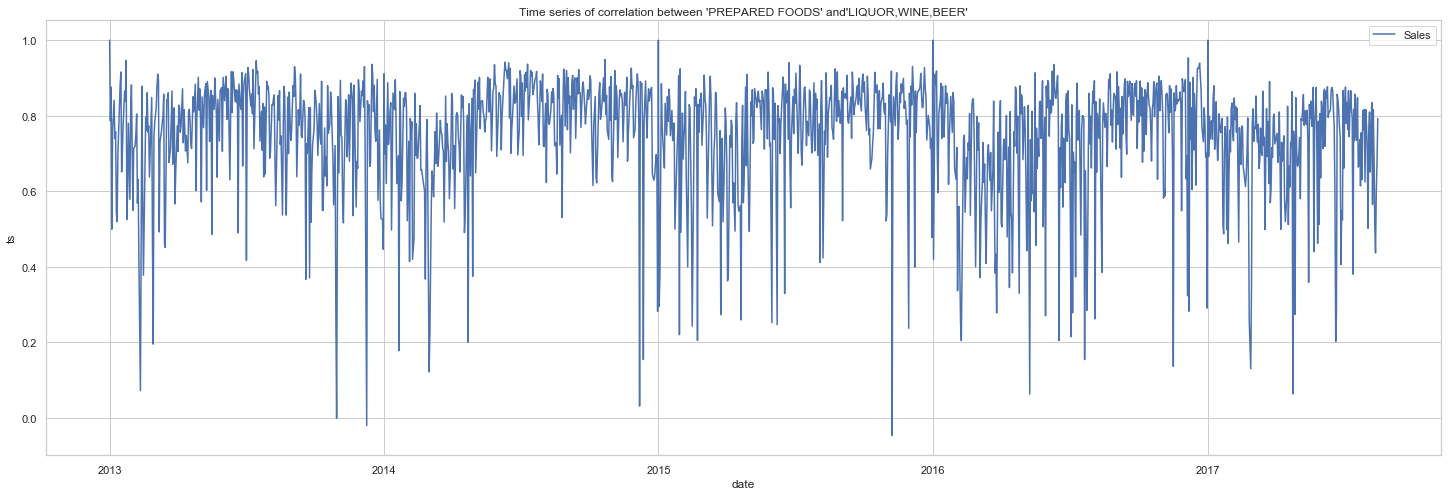

In [45]:
dd = pd.DataFrame()
dd['date'] = d['date'].unique()
dd['ts'] = ts
dd = treat_missing_values(dd, method='linear')
plt.figure(figsize = (25,8))
plt.title("Time series of correlation between 'PREPARED FOODS' and'LIQUOR,WINE,BEER'")
sns.lineplot(x='date', y='ts', data=dd, label='Sales')
plt.show()

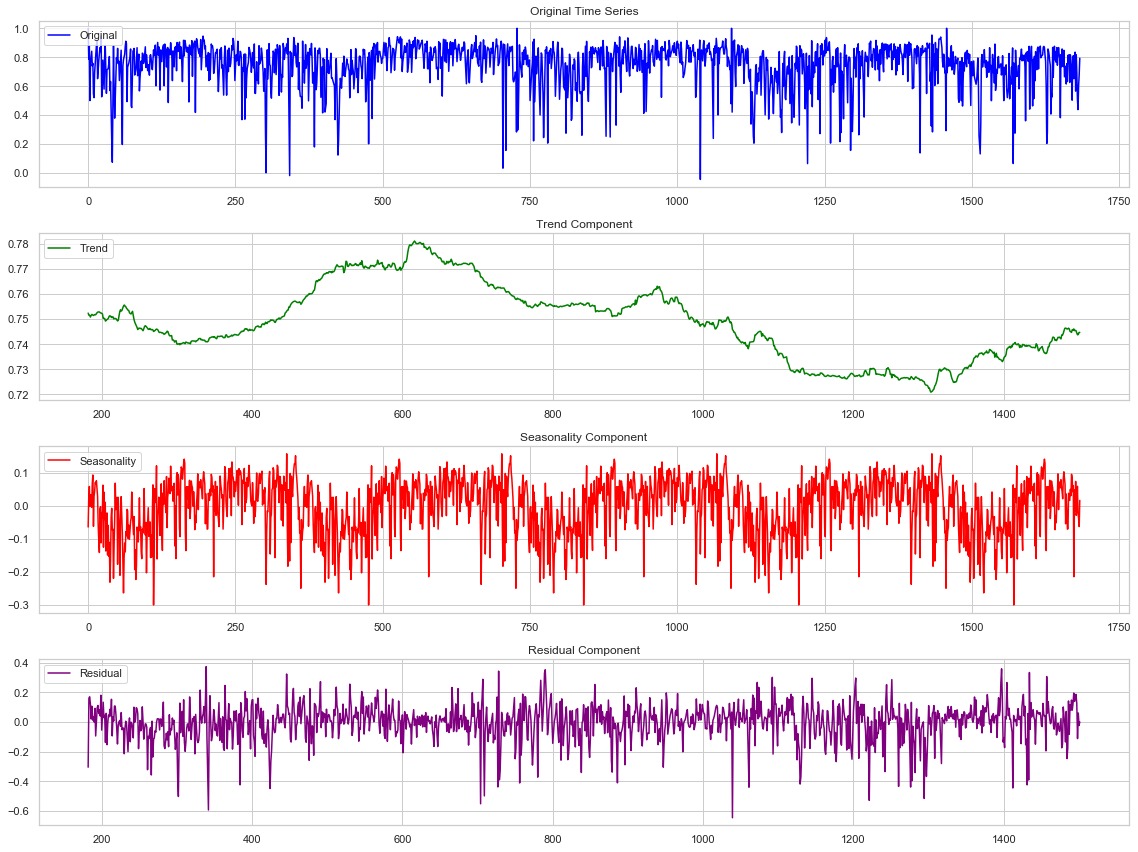

In [43]:
dd = dd.dropna()
plot = decompose_time_series(dd['ts'], period = 365)

In [199]:
KPSS(dd['ts'])
ADF(dd['ts']) 

'STATIONARY'